In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from DataProcessor import Data_Processor

In [23]:
DP=Data_Processor(start_month='2015-01',end_month='2015-02',template="/Users/ethan_bao/Wealth_Management")

DP.ReadData()
DP.Specify_Lang()
DP.DataNums()

([8411, 6814], 15225)

In [27]:
bigrams=DP.GetNGrams(1,lemma=True)
DP.GetFreq(bigrams)

[('WealthManagement', 5693),
 ('wealthmanagement', 1961),
 ('Smartmoney', 770),
 ('moneyloading', 770),
 ('Nobrainer', 724),
 ('braineralert', 724),
 ('alertHALB', 724),
 ('HALBEveryone', 724),
 ('Everyonewatching', 724),
 ('Hugeplay', 690),
 ('playmaking', 690),
 ('makingHALB', 690),
 ('HALBMonster', 690),
 ('Monsterday', 690),
 ('dayahead', 690),
 ('Thiscould', 686),
 ('HALBtrading', 683),
 ('tradingaround', 683),
 ('around01', 683),
 ('01This', 683),
 ('couldrun', 683),
 ('run03', 683),
 ('03ease', 683),
 ('HALBsuper', 678),
 ('supersolid', 678),
 ('solidlevel', 678),
 ('levelOnce', 678),
 ('Oncebreak', 678),
 ('break03', 678),
 ('03go', 678),
 ('gocrazy', 678),
 ('loadingHALB', 677),
 ('HALBMassive', 651),
 ('Massivebuying', 651),
 ('buyingopportunity', 651),
 ('opportunity01', 651),
 ('MorganStanley', 435),
 ('STAWealth', 284),
 ('SubmittedLance', 282),
 ('LanceRoberts', 282),
 ('RobertsSTA', 269),
 ('PrivateWealth', 255),
 ('Wealthmanagement', 247),
 ('managementfirm', 195),
 ('M

In [28]:
unigrams=DP.GetNGrams(1,lemma=True)
DP.GetFreq(unigrams)

[('Wealth', 6237),
 ('Management', 5906),
 ('HALB', 4103),
 ('management', 2297),
 ('wealth', 2065),
 ('03', 1362),
 ('01', 1334),
 ('go', 851),
 ('money', 846),
 ('The', 811),
 ('level', 798),
 ('This', 793),
 ('Smart', 789),
 ('break', 789),
 ('day', 780),
 ('loading', 770),
 ('No', 762),
 ('watching', 727),
 ('Everyone', 726),
 ('alert', 725),
 ('brainer', 724),
 ('making', 723),
 ('could', 718),
 ('opportunity', 709),
 ('around', 698),
 ('play', 695),
 ('ahead', 694),
 ('trading', 693),
 ('super', 693),
 ('Huge', 691),
 ('Monster', 690),
 ('solid', 685),
 ('run', 683),
 ('ease', 683),
 ('crazy', 681),
 ('Once', 680),
 ('buying', 658),
 ('ACRT', 653),
 ('Massive', 651),
 ('New', 511),
 ('Financial', 496),
 ('Private', 481),
 ('Morgan', 465),
 ('Stanley', 446),
 ('Manager', 430),
 ('2015', 399),
 ('next', 386),
 ('Business', 364),
 ('firm', 351),
 ('Advisor', 338),
 ('Analyst', 306),
 ('RBC', 293),
 ('client', 292),
 ('STA', 286),
 ('Submitted', 282),
 ('Lance', 282),
 ('Roberts', 28

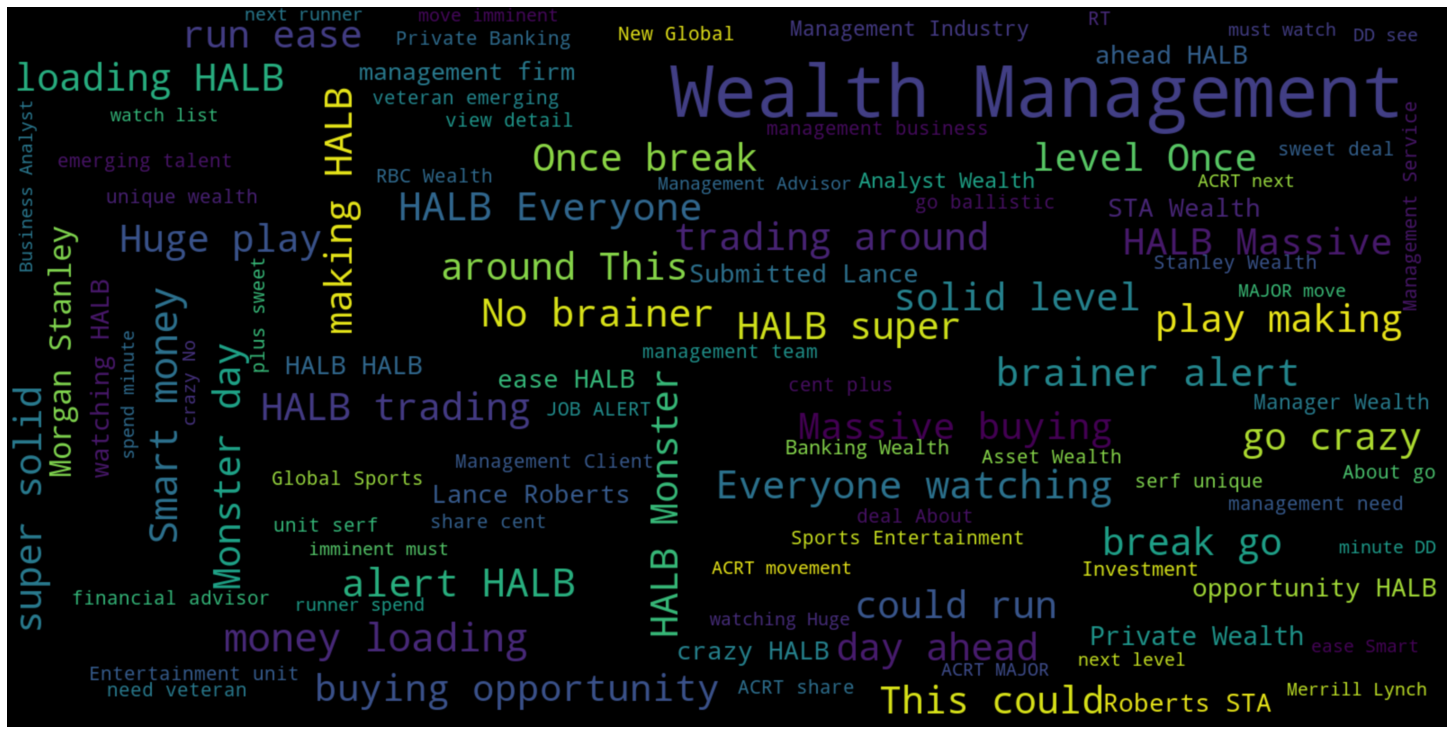

In [36]:
single_sentence=DP.Combine(unigrams)
wordcloud = WordCloud(width=1600, height=800,max_font_size=80, stopwords=STOPWORDS,max_words=100).generate(single_sentence)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation='bicubic')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()